-----------------------------------------------------------------------------------------

Actividad en Clase

-----------------------------------------------------------------------------------------

In [4]:
# Importar Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Carga del archivo
data = pd.read_csv('inmuebles_sin_nulos.csv')
data

In [ ]:
# Corroborar valores nulos
nulos = data.isnull().sum()
nulos

# Notar que no aparecen valores nulos

Unnamed: 0      0
Fecha Alta      0
Tipo            0
Operación       0
Provincia       0
Superficie      0
Precio Venta    0
Fecha Venta     0
Vendedor        0
dtype: int64

**PROCEDIMIENTO PARA SEPARAR DATAFRAME EN 2 PARTES (CUANTITATIVAS Y CUALITATIVAS)**

In [ ]:
# Verificar información de la Base de Datos (DataFrame)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    3337 non-null   int64  
 1   Fecha Alta    3337 non-null   object 
 2   Tipo          3337 non-null   object 
 3   Operación     3337 non-null   object 
 4   Provincia     3337 non-null   object 
 5   Superficie    3337 non-null   float64
 6   Precio Venta  3337 non-null   float64
 7   Fecha Venta   3337 non-null   object 
 8   Vendedor      3337 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 234.8+ KB


In [ ]:
# Filtro para obtener variables cuantitativas
Cuant = data.iloc[ : , [0, 5,6]]
Cuant

Unnamed: 0  Superficie  Precio Venta
0              0       291.0     2133903.0
1              1       185.0     1945424.0
2              2        82.0     1121906.0
3              3       285.0     1121906.0
4              4       152.0      185000.0
...          ...         ...           ...
3332        3332       221.0     1450644.0
3333        3333        55.0      454080.0
3334        3334        78.0      740688.0
3335        3335        88.0      397408.0
3336        3336       170.2     2140712.0

[3337 rows x 3 columns]

In [ ]:
# Filtro para obtener variables cualitativas
Cuali =data.iloc[ : , [1,2,3,4,7,8]]
Cuali

Fecha Alta        Tipo Operación  Provincia  \
0     2004-01-01 00:00:00     Parking  Alquiler     Lleida   
1     2004-01-01 00:00:00       Local     Venta     Girona   
2     2004-01-01 00:00:00     Oficina  Alquiler     Girona   
3     2004-01-02 00:00:00     Parking  Alquiler     Girona   
4     2004-01-02 00:00:00       Suelo     Venta  Tarragona   
...                   ...         ...       ...        ...   
3332  2007-04-29 00:00:00  Industrial  Alquiler     Lleida   
3333  2007-04-29 00:00:00        Piso  Alquiler     Girona   
3334  2007-04-30 00:00:00       Suelo     Venta  Tarragona   
3335  2007-04-30 00:00:00        Piso  Alquiler  Barcelona   
3336  2007-04-30 00:00:00     Parking     Venta     Lleida   

              Fecha Venta Vendedor  
0     2004-06-19 00:00:00   Carmen  
1     2004-04-19 00:00:00    Pedro  
2     2004-11-08 00:00:00  Joaquín  
3     2004-04-27 00:00:00    Jesús  
4     2004-07-10 00:00:00    María  
...                   ...      ...  
3332  2030-06-19 00:00:00    María  
3333  2030-06-19 00:00:00    María  
3334  2030-06-19 00:00:00    María  
3335  2030-06-19 00:00:00    María  
3336  2030-06-19 00:00:00    María  

[3337 rows x 6 columns]

In [ ]:
# Diagrama de Caja Bigote
fig = plt.figure(figsize =(15, 8))            # Tamaño de la figura
Cuant.plot(kind='box', vert=True)             # Ploteamos las variables cuantitativas, seleccionamso el diagrama de caja bigote
                                              # Y se hace vertical

plt.title("Valores Atípicos del Dataframe")   # Titulo de la grafica
plt.show()                                    # Para mostrar la grafica

**PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME**

In [ ]:
# Método con desviación estandar. Se encuentran valores extremos
y = Cuant
Lim_Superior = y.mean() + 3*y.std()
Lim_Inferior = y.mean() - 3*y.std()
print("Limite superior permitido", Lim_Superior)
print("Limite inferior permitido", Lim_Inferior)

Limite superior permitido Unnamed: 0      4.558360e+03
Superficie      3.960976e+02
Precio Venta    3.068192e+06
dtype: float64
Limite inferior permitido Unnamed: 0       -1222.359753
Superficie         -55.625443
Precio Venta   -664643.419079
dtype: float64


In [ ]:
# Ajustar maximo de filas
pd.options.display.max_rows = None

# Obtener datos y outliers, que se convierten en nulos en el DataFrame
Datos_sin_Outliers = Cuant[(y<=Lim_Superior)&(y>=Lim_Inferior)]
Datos_sin_Outliers

Unnamed: 0  Superficie  Precio Venta
0              0       291.0     2133903.0
1              1       185.0     1945424.0
2              2        82.0     1121906.0
3              3       285.0     1121906.0
4              4       152.0      185000.0
5              5       131.0      953156.0
6              6       170.2      406686.0
7              7       235.0     2158475.0
8              8       108.0     1024380.0
9              9       299.0     2042768.0
10            10       124.0      627068.0
11            11       187.0      999328.0
12            12       170.2     2937300.0
13            13        68.0      664700.0
14            14       176.0      820336.0
15            15       179.0      937960.0
16            16        58.0      358846.0
17            17       283.0     1679605.0
18            18        55.0      472615.0
19            19       148.0     1169496.0
20            20       228.0     2020992.0
21            21       116.0      727552.0
22            22       183.0     1438929.0
23            23        79.0     1121906.0
24            24       124.0     1170684.0
25            25        70.0      549780.0
26            26        70.0      659330.0
27            27       187.0     1660560.0
28            28        91.0      753571.0
29            29       201.0      939072.0
30            30       142.0     1405374.0
31            31        92.0      627348.0
32            32       181.0     1504110.0
33            33       281.0     2483197.0
34            34       257.0     1799771.0
35            35       140.0     1054340.0
36            36       229.0     1160572.0
37            37       300.0     1492800.0
38            38       215.0     1154980.0
39            39       182.0     1057784.0
40            40       230.0     1421860.0
41            41       168.0     1426992.0
42            42        74.0      579716.0
43            43       278.0     1537062.0
44            44       287.0     2851058.0
45            45       224.0     1294048.0
46            46        53.0      249418.0
47            47       284.0     1457488.0
48            48        40.0      321680.0
49            49       235.0      957625.0
50            50        90.0      568620.0
51            51       206.0     1605564.0
52            52       158.0     1438748.0
53            53        71.0      686996.0
54            54       127.0      983234.0
55            55        54.0      239220.0
56            56        54.0      512730.0
57            57       274.0     2287626.0
58            58       166.0     1373816.0
59            59       270.0     1920240.0
60            60       120.0     1140840.0
61            61       178.0     1142938.0
62            62       144.0      738144.0
63            63        57.0      509010.0
64            64       144.0     1436832.0
65            65       272.0     2119424.0
66            66       219.0      948927.0
67            67        68.0      376992.0
68            68       248.0     2212408.0
69            69       179.0     1647695.0
70            70       235.0     1939925.0
71            71       216.0     1478952.0
72            72        62.0      320044.0
73            73       229.0     1098055.0
74            74        41.0      187862.0
75            75       234.0     1757106.0
76            76       112.0     1104992.0
77            77        87.0      448485.0
78            78       298.0     2520484.0
79            79       217.0     1339107.0
80            80       236.0     1812244.0
81            81       117.0     1069731.0
82            82        56.0      471072.0
83            83        94.0      470940.0
84            84       127.0      925322.0
85            85       275.0     2141700.0
86            86        93.0      778875.0
87            87        58.0      421196.0
88            88        49.0      219716.0
89            89       292.0     2685816.0
90            90       123.0      723609.0
91            91        48.0      388032.0
92     

In [ ]:
# Corroboramos valores nulos
nulos = Datos_sin_Outliers.isnull().sum()
nulos

Unnamed: 0      0
Superficie      0
Precio Venta    0
dtype: int64

In [ ]:
# Realizar una copia del dataframe
data_clean = Datos_sin_Outliers.copy()

# Reemplazar valores atípicos (nulos) del dataframe con "mean"
data_clean = data_clean.fillna(round(Datos_sin_Outliers.mean(),1))
data_clean

Unnamed: 0  Superficie  Precio Venta
0              0       291.0     2133903.0
1              1       185.0     1945424.0
2              2        82.0     1121906.0
3              3       285.0     1121906.0
4              4       152.0      185000.0
5              5       131.0      953156.0
6              6       170.2      406686.0
7              7       235.0     2158475.0
8              8       108.0     1024380.0
9              9       299.0     2042768.0
10            10       124.0      627068.0
11            11       187.0      999328.0
12            12       170.2     2937300.0
13            13        68.0      664700.0
14            14       176.0      820336.0
15            15       179.0      937960.0
16            16        58.0      358846.0
17            17       283.0     1679605.0
18            18        55.0      472615.0
19            19       148.0     1169496.0
20            20       228.0     2020992.0
21            21       116.0      727552.0
22            22       183.0     1438929.0
23            23        79.0     1121906.0
24            24       124.0     1170684.0
25            25        70.0      549780.0
26            26        70.0      659330.0
27            27       187.0     1660560.0
28            28        91.0      753571.0
29            29       201.0      939072.0
30            30       142.0     1405374.0
31            31        92.0      627348.0
32            32       181.0     1504110.0
33            33       281.0     2483197.0
34            34       257.0     1799771.0
35            35       140.0     1054340.0
36            36       229.0     1160572.0
37            37       300.0     1492800.0
38            38       215.0     1154980.0
39            39       182.0     1057784.0
40            40       230.0     1421860.0
41            41       168.0     1426992.0
42            42        74.0      579716.0
43            43       278.0     1537062.0
44            44       287.0     2851058.0
45            45       224.0     1294048.0
46            46        53.0      249418.0
47            47       284.0     1457488.0
48            48        40.0      321680.0
49            49       235.0      957625.0
50            50        90.0      568620.0
51            51       206.0     1605564.0
52            52       158.0     1438748.0
53            53        71.0      686996.0
54            54       127.0      983234.0
55            55        54.0      239220.0
56            56        54.0      512730.0
57            57       274.0     2287626.0
58            58       166.0     1373816.0
59            59       270.0     1920240.0
60            60       120.0     1140840.0
61            61       178.0     1142938.0
62            62       144.0      738144.0
63            63        57.0      509010.0
64            64       144.0     1436832.0
65            65       272.0     2119424.0
66            66       219.0      948927.0
67            67        68.0      376992.0
68            68       248.0     2212408.0
69            69       179.0     1647695.0
70            70       235.0     1939925.0
71            71       216.0     1478952.0
72            72        62.0      320044.0
73            73       229.0     1098055.0
74            74        41.0      187862.0
75            75       234.0     1757106.0
76            76       112.0     1104992.0
77            77        87.0      448485.0
78            78       298.0     2520484.0
79            79       217.0     1339107.0
80            80       236.0     1812244.0
81            81       117.0     1069731.0
82            82        56.0      471072.0
83            83        94.0      470940.0
84            84       127.0      925322.0
85            85       275.0     2141700.0
86            86        93.0      778875.0
87            87        58.0      421196.0
88            88        49.0      219716.0
89            89       292.0     2685816.0
90            90       123.0      723609.0
91            91        48.0      388032.0
92     

In [ ]:
# Corroborar valores nulos
nulos = data_clean.isnull().sum()
nulos

Unnamed: 0      0
Superficie      0
Precio Venta    0
dtype: int64

**PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**

In [ ]:
# Método aplicando Cuartiles. Encontrar cuartiles 0.25 y 0.75
y=Cuant

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Lim_Superior_iqr = percentile75 + 1.5*iqr
Lim_Inferior_iqr = percentile25 - 1.5*iqr
print("Limite superior permitido", Lim_Superior_iqr)
print("Limite inferior permitido", Lim_Inferior_iqr)

Limite superior permitido Unnamed: 0         5004.0
Superficie          432.5
Precio Venta    3007754.0
dtype: float64
Limite inferior permitido Unnamed: 0       -1668.0
Superficie         -91.5
Precio Venta   -691390.0
dtype: float64


In [ ]:
# Obtener datos limpios del Dataframe
Datos_sin_Outliers_iqr= Cuant[(y<=Lim_Superior_iqr)&(y>=Lim_Inferior_iqr)]
Datos_sin_Outliers_iqr

# Corroborar valores nulos
nulos = Datos_sin_Outliers_iqr.isnull().sum()
nulos

Unnamed: 0      0
Superficie      0
Precio Venta    0
dtype: int64

In [ ]:
# Reemplazar valores atípicos (nulos) del dataframe con "mean"
# Realizar una copia del dataframe
data_clean_iqr = Datos_sin_Outliers_iqr.copy()
data_clean_iqr = data_clean_iqr.fillna(round(Datos_sin_Outliers_iqr.mean(),1))
data_clean_iqr

# Corroborar valores nulos
nulos = data_clean_iqr.isnull().sum()
nulos

Unnamed: 0      0
Superficie      0
Precio Venta    0
dtype: int64

**UNIÓN DE DATAFRAME CUANTITATIVO CON DATAFRAME CUALITATIVO**

In [ ]:
Df_final = pd.concat([Cuali, data_clean_iqr], axis=1)
Df_final

Fecha Alta        Tipo Operación  Provincia  \
0     2004-01-01 00:00:00     Parking  Alquiler     Lleida   
1     2004-01-01 00:00:00       Local     Venta     Girona   
2     2004-01-01 00:00:00     Oficina  Alquiler     Girona   
3     2004-01-02 00:00:00     Parking  Alquiler     Girona   
4     2004-01-02 00:00:00       Suelo     Venta  Tarragona   
5     2004-01-03 00:00:00  Industrial  Alquiler     Girona   
6     2004-01-03 00:00:00  Industrial  Alquiler  Tarragona   
7     2004-01-03 00:00:00     Oficina     Venta     Girona   
8     2004-01-04 00:00:00        Piso  Alquiler     Lleida   
9     2004-01-04 00:00:00     Parking     Venta     Lleida   
10    2004-01-04 00:00:00     Oficina  Alquiler     Girona   
11    2004-01-04 00:00:00  Industrial     Venta     Girona   
12    2004-01-04 00:00:00     Parking     Venta  Barcelona   
13    2004-01-04 00:00:00       Local     Venta  Tarragona   
14    2004-01-04 00:00:00  Industrial  Alquiler     Girona   
15    2004-01-05 00:00:00        Casa  Alquiler     Girona   
16    2004-01-05 00:00:00        Casa  Alquiler  Tarragona   
17    2004-01-06 00:00:00       Suelo     Venta  Barcelona   
18    2004-01-07 00:00:00        Piso  Alquiler     Girona   
19    2004-01-08 00:00:00     Oficina  Alquiler  Barcelona   
20    2004-01-09 00:00:00  Industrial     Venta  Barcelona   
21    2004-01-09 00:00:00     Oficina  Alquiler     Lleida   
22    2004-01-10 00:00:00        Casa  Alquiler     Girona   
23    2004-01-10 00:00:00     Oficina  Alquiler  Tarragona   
24    2004-01-10 00:00:00     Oficina  Alquiler  Barcelona   
25    2004-01-10 00:00:00       Local  Alquiler  Tarragona   
26    2004-01-11 00:00:00       Local  Alquiler  Tarragona   
27    2004-01-12 00:00:00        Casa  Alquiler  Barcelona   
28    2004-01-12 00:00:00        Casa  Alquiler  Tarragona   
29    2004-01-12 00:00:00       Local  Alquiler  Tarragona   
30    2004-01-13 00:00:00  Industrial  Alquiler  Barcelona   
31    2004-01-13 00:00:00        Casa  Alquiler     Girona   
32    2004-01-15 00:00:00       Local  Alquiler  Barcelona   
33    2004-01-15 00:00:00        Casa     Venta  Barcelona   
34    2004-01-15 00:00:00  Industrial  Alquiler  Tarragona   
35    2004-01-16 00:00:00  Industrial  Alquiler  Tarragona   
36    2004-01-16 00:00:00       Local     Venta     Girona   
37    2004-01-17 00:00:00       Suelo  Alquiler  Tarragona   
38    2004-01-18 00:00:00     Parking  Alquiler  Tarragona   
39    2004-01-18 00:00:00     Oficina     Venta     Girona   
40    2004-01-18 00:00:00        Piso     Venta  Barcelona   
41    2004-01-19 00:00:00     Oficina     Venta  Tarragona   
42    2004-01-19 00:00:00     Oficina  Alquiler     Girona   
43    2004-01-19 00:00:00        Casa     Venta     Girona   
44    2004-01-20 00:00:00     Oficina  Alquiler  Barcelona   
45    2004-01-20 00:00:00     Oficina  Alquiler     Lleida   
46    2004-01-20 00:00:00        Piso  Alquiler  Barcelona   
47    2004-01-20 00:00:00  Industrial     Venta  Barcelona   
48    2004-01-20 00:00:00       Local     Venta     Girona   
49    2004-01-20 00:00:00       Local  Alquiler  Tarragona   
50    2004-01-20 00:00:00  Industrial     Venta     Lleida   
51    2004-01-22 00:00:00       Local  Alquiler     Lleida   
52    2004-01-22 00:00:00       Suelo  Alquiler  Tarragona   
53    2004-01-22 00:00:00       Suelo  Alquiler  Barcelona   
54    2004-01-22 00:00:00       Local     Venta     Girona   
55    2004-01-23 00:00:00        Piso     Venta     Lleida   
56    2004-01-23 00:00:00     Oficina  Alquiler     Lleida   
57    2004-01-24 00:00:00       Local  Alquiler     Girona   
58    2004-01-24 00:00:00  Industrial     Venta  Tarragona   
59    2004-01-24 00:00:00     Oficina  Alquiler     Lleida   
60    2004-01-24 00:00:00        Casa     Venta  Tarragona   
61    2004-01-24 00:00:00  Industrial     Venta  Tarragona   
62    2004-01-25 00:00:00        Piso     Venta  Barcelona   
63    2004-01-26 00:00:00  Industrial     Venta

In [ ]:
# Descargar archivo
Df_final.to_csv("Dataframe_procesado.csv")
files.download("Dataframe_procesado.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

-----------------------------------------------------------------------------------------

Actividad 3 Valores Atípicos

-----------------------------------------------------------------------------------------

In [31]:
# Importar Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Carga del archivo
V = pd.read_csv('Ventas_Totales_Limpio.csv')
VT = V.drop(["Unnamed: 0"], axis = 1)
VT

indice_tiempo  ventas_precios_corrientes  ventas_precios_constantes  \
0     01/01/2017                    27858.9                    27477.3   
1     01/02/2017                    25994.2                    25223.4   
2     01/03/2017                    27780.0                    26334.3   
3     01/04/2017                    29134.3                    27045.9   
4     01/05/2017                    27969.0                    25631.9   
5     01/06/2017                    29132.7                    26365.4   
6     01/07/2017                    31182.3                    27819.4   
7     01/08/2017                    31154.9                    27394.1   
8     01/09/2017                    30521.5                    26404.3   
9     01/10/2017                    32446.0                    27766.7   
10    01/11/2017                    33629.0                    28425.3   
11    01/12/2017                    40766.3                    34084.5   
12    01/01/2018                    32479.2                    26736.7   
13    01/02/2018                    31736.8                    25650.7   
14    01/03/2018                    36531.3                    28846.7   
15    01/04/2018                    34113.7                    26429.5   
16    01/05/2018                    35133.1                    26430.5   
17    01/06/2018                    38338.2                    27465.9   
18    01/07/2018                    39278.4                    27033.4   
19    01/08/2018                    39491.9                    26267.3   
20    01/09/2018                    39925.5                    24310.8   
21    01/10/2018                    43420.3                    25010.5   
22    01/11/2018                    44849.4                    24891.7   
23    01/12/2018                    57204.0                    31136.1   
24    01/01/2019                    45433.6                    23888.7   
25    01/02/2019                    44592.1                    22542.0   
26    01/03/2019                    51065.7                    24647.7   
27    01/04/2019                    49621.4                    23073.8   
28    01/05/2019                    50778.3                    22852.1   
29    01/06/2019                    54413.4                    23803.4   
30    01/07/2019                    55044.5                    23580.1   
31    01/08/2019                    59672.1                    24329.9   
32    01/09/2019                    57885.3                    22144.7   
33    01/10/2019                    66325.6                    24652.7   
34    01/11/2019                    67943.7                    24270.7   
35    01/12/2019                    83524.6                    29147.9   
36    01/01/2020                    70145.0                    23483.3   
37    01/02/2020                    72494.4                    23702.0   
38    01/03/2020                    85778.0                    26996.7   
39    01/04/2020                    75009.6                    23142.7   
40    01/05/2020                    78594.5                    24012.7   
41    01/06/2020                    78232.9                    23449.5   
42    01/07/2020                   211140.7                    50791.4   
43    01/08/2020                    80412.0                    22953.0   
44    01/09/2020                    77055.8                    21628.0   
45    01/10/2020                    89224.3                    24105.8   
46    01/11/2020                      200.5                    24010.7   
47    01/12/2020                   115806.1                    29931.1   
48    01/01/2021                    98007.6                    24420.0   
49    01/02/2021                    92954.2                    22322.6   
50    01/03/2021                   107225.9                    24627.6   
51    01/04/2021                   106870.2                    23407.5   
52    01/05/2021                   110604.7                    23368.4   
53    0

In [32]:
# Corroborar valores nulos
nulos = VT.isnull().sum()
nulos

# Notar que no aparecen valores nulos

indice_tiempo                          0
ventas_precios_corrientes              0
ventas_precios_constantes              0
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                0
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    0
electronicos_articulos_hogar           0
otros                                  0
dtype: int64

In [39]:
# Verificar información de la Base de Datos (DataFrame)
VT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   indice_tiempo                        65 non-null     object 
 1   ventas_precios_corrientes            65 non-null     float64
 2   ventas_precios_constantes            65 non-null     float64
 3   ventas_totales_canal_venta           65 non-null     float64
 4   salon_ventas                         65 non-null     float64
 5   canales_on_line                      65 non-null     float64
 6   ventas_totales_medio_pago            65 non-null     float64
 7   efectivo                             65 non-null     float64
 8   tarjetas_debito                      65 non-null     float64
 9   tarjetas_credito                     65 non-null     float64
 10  otros_medios                         65 non-null     float64
 11  ventas_totales_grupo_articulos    

In [40]:
# Filtro para obtener variables cualitativas
Cualita = VT.iloc[ : , [0]]
Cualita

indice_tiempo
0     01/01/2017
1     01/02/2017
2     01/03/2017
3     01/04/2017
4     01/05/2017
5     01/06/2017
6     01/07/2017
7     01/08/2017
8     01/09/2017
9     01/10/2017
10    01/11/2017
11    01/12/2017
12    01/01/2018
13    01/02/2018
14    01/03/2018
15    01/04/2018
16    01/05/2018
17    01/06/2018
18    01/07/2018
19    01/08/2018
20    01/09/2018
21    01/10/2018
22    01/11/2018
23    01/12/2018
24    01/01/2019
25    01/02/2019
26    01/03/2019
27    01/04/2019
28    01/05/2019
29    01/06/2019
30    01/07/2019
31    01/08/2019
32    01/09/2019
33    01/10/2019
34    01/11/2019
35    01/12/2019
36    01/01/2020
37    01/02/2020
38    01/03/2020
39    01/04/2020
40    01/05/2020
41    01/06/2020
42    01/07/2020
43    01/08/2020
44    01/09/2020
45    01/10/2020
46    01/11/2020
47    01/12/2020
48    01/01/2021
49    01/02/2021
50    01/03/2021
51    01/04/2021
52    01/05/2021
53    01/06/2021
54    01/07/2021
55    01/08/2021
56    01/09/2021
57    01/10/2021
58    01/11/2021
59    01/12/2021
60    01/01/2022
61    01/02/2022
62    01/03/2022
63    01/04/2022
64    01/05/2022

In [41]:
# Filtro para obtener variables cuantitativas
Cuantita = VT.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]]
Cuantita

ventas_precios_corrientes  ventas_precios_constantes  \
0                     27858.9                    27477.3   
1                     25994.2                    25223.4   
2                     27780.0                    26334.3   
3                     29134.3                    27045.9   
4                     27969.0                    25631.9   
5                     29132.7                    26365.4   
6                     31182.3                    27819.4   
7                     31154.9                    27394.1   
8                     30521.5                    26404.3   
9                     32446.0                    27766.7   
10                    33629.0                    28425.3   
11                    40766.3                    34084.5   
12                    32479.2                    26736.7   
13                    31736.8                    25650.7   
14                    36531.3                    28846.7   
15                    34113.7                    26429.5   
16                    35133.1                    26430.5   
17                    38338.2                    27465.9   
18                    39278.4                    27033.4   
19                    39491.9                    26267.3   
20                    39925.5                    24310.8   
21                    43420.3                    25010.5   
22                    44849.4                    24891.7   
23                    57204.0                    31136.1   
24                    45433.6                    23888.7   
25                    44592.1                    22542.0   
26                    51065.7                    24647.7   
27                    49621.4                    23073.8   
28                    50778.3                    22852.1   
29                    54413.4                    23803.4   
30                    55044.5                    23580.1   
31                    59672.1                    24329.9   
32                    57885.3                    22144.7   
33                    66325.6                    24652.7   
34                    67943.7                    24270.7   
35                    83524.6                    29147.9   
36                    70145.0                    23483.3   
37                    72494.4                    23702.0   
38                    85778.0                    26996.7   
39                    75009.6                    23142.7   
40                    78594.5                    24012.7   
41                    78232.9                    23449.5   
42                   211140.7                    50791.4   
43                    80412.0                    22953.0   
44                    77055.8                    21628.0   
45                    89224.3                    24105.8   
46                      200.5                    24010.7   
47                   115806.1                    29931.1   
48                    98007.6                    24420.0   
49                    92954.2                    22322.6   
50                   107225.9                    24627.6   
51                   106870.2                    23407.5   
52                   110604.7                    23368.4   
53                   116287.9                    23678.0   
54                   125658.6                    24779.5   
55                   124840.3                    23990.1   
56                   123002.3                    22962.0   
57                   140487.5                    25386.7   
58                   141702.0                    25026.6   
59                   183983.2                    31595.7   
60                   154517.1                    45463.4   
61                   152202.6                    23802.1   
62                       16.5                    24612.4   
63                   177148.1                    24140.5   
64                   179639.2                    23234.2   

    ventas_totales_canal_venta  salon_venta

<Figure size 1500x800 with 0 Axes>

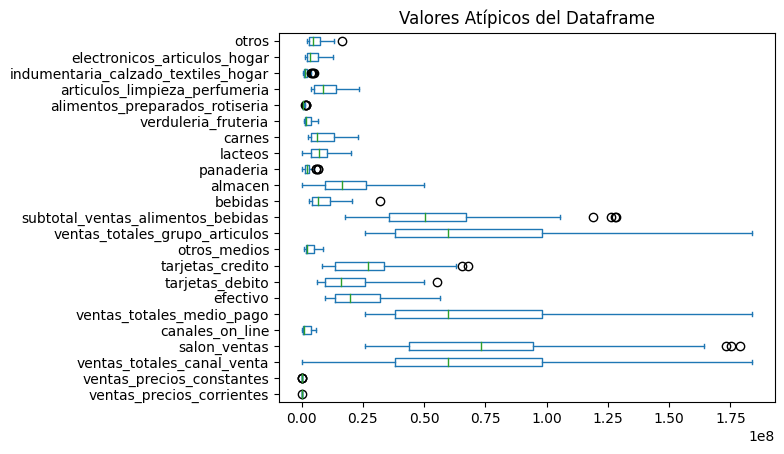

In [42]:
# Diagrama de Caja Bigote
fig = plt.figure(figsize =(15, 8))            # Tamaño de la figura
Cuantita.plot(kind='box', vert=False)             # Ploteamos las variables cuantitativas, seleccionamso el diagrama de caja bigote
                                              # Y se hace vertical

plt.title("Valores Atípicos del Dataframe")   # Titulo de la grafica
plt.show()                                    # Para mostrar la grafica

**Procedimiento con Desviación Estándar**

In [43]:
y = Cuantita
Lim_Sup = y.mean() + 3*y.std()
Lim_Inf = y.mean() - 3*y.std()
print("Limite superior permitido", Lim_Sup)
print("Limite inferior permitido", Lim_Inf)

Limite superior permitido ventas_precios_corrientes              2.143126e+05
ventas_precios_constantes              4.002291e+04
ventas_totales_canal_venta             2.074407e+08
salon_ventas                           1.976066e+08
canales_on_line                        7.623053e+06
ventas_totales_medio_pago              2.059531e+08
efectivo                               6.191160e+07
tarjetas_debito                        5.821184e+07
tarjetas_credito                       7.230605e+07
otros_medios                           1.048640e+07
ventas_totales_grupo_articulos         2.059531e+08
subtotal_ventas_alimentos_bebidas      1.424194e+08
bebidas                                2.646939e+07
almacen                                5.596359e+07
panaderia                              6.969902e+06
lacteos                                2.243904e+07
carnes                                 2.528319e+07
verduleria_fruteria                    7.593897e+06
alimentos_preparados_rotiseria        

In [44]:
# Ajustar maximo de filas
pd.options.display.max_rows = None

# Obtener datos y outliers, que se convierten en nulos en el DataFrame
VT_sin_Outliers = Cuantita[(y<=Lim_Sup)&(y>=Lim_Inf)]
VT_sin_Outliers

ventas_precios_corrientes  ventas_precios_constantes  \
0                     27858.9                    27477.3   
1                     25994.2                    25223.4   
2                     27780.0                    26334.3   
3                     29134.3                    27045.9   
4                     27969.0                    25631.9   
5                     29132.7                    26365.4   
6                     31182.3                    27819.4   
7                     31154.9                    27394.1   
8                     30521.5                    26404.3   
9                     32446.0                    27766.7   
10                    33629.0                    28425.3   
11                    40766.3                    34084.5   
12                    32479.2                    26736.7   
13                    31736.8                    25650.7   
14                    36531.3                    28846.7   
15                    34113.7                    26429.5   
16                    35133.1                    26430.5   
17                    38338.2                    27465.9   
18                    39278.4                    27033.4   
19                    39491.9                    26267.3   
20                    39925.5                    24310.8   
21                    43420.3                    25010.5   
22                    44849.4                    24891.7   
23                    57204.0                    31136.1   
24                    45433.6                    23888.7   
25                    44592.1                    22542.0   
26                    51065.7                    24647.7   
27                    49621.4                    23073.8   
28                    50778.3                    22852.1   
29                    54413.4                    23803.4   
30                    55044.5                    23580.1   
31                    59672.1                    24329.9   
32                    57885.3                    22144.7   
33                    66325.6                    24652.7   
34                    67943.7                    24270.7   
35                    83524.6                    29147.9   
36                    70145.0                    23483.3   
37                    72494.4                    23702.0   
38                    85778.0                    26996.7   
39                    75009.6                    23142.7   
40                    78594.5                    24012.7   
41                    78232.9                    23449.5   
42                   211140.7                        NaN   
43                    80412.0                    22953.0   
44                    77055.8                    21628.0   
45                    89224.3                    24105.8   
46                      200.5                    24010.7   
47                   115806.1                    29931.1   
48                    98007.6                    24420.0   
49                    92954.2                    22322.6   
50                   107225.9                    24627.6   
51                   106870.2                    23407.5   
52                   110604.7                    23368.4   
53                   116287.9                    23678.0   
54                   125658.6                    24779.5   
55                   124840.3                    23990.1   
56                   123002.3                    22962.0   
57                   140487.5                    25386.7   
58                   141702.0                    25026.6   
59                   183983.2                    31595.7   
60                   154517.1                        NaN   
61                   152202.6                    23802.1   
62                       16.5                    24612.4   
63                   177148.1                    24140.5   
64                   179639.2                    23234.2   

    ventas_totales_canal_venta  salon_venta

In [45]:
# Corroborar valores nulos
nulos = VT_sin_Outliers.isnull().sum()
nulos

ventas_precios_corrientes              0
ventas_precios_constantes              2
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                1
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    1
electronicos_articulos_hogar           0
otros                                  1
dtype: int64

In [46]:
# Realizar una copia del dataframe
VT_clean = VT_sin_Outliers.copy()

# Reemplazar valores atípicos (nulos) del dataframe con "mean"
VT_clean = VT_clean.fillna(round(VT_sin_Outliers.mean(),1))
VT_clean

ventas_precios_corrientes  ventas_precios_constantes  \
0                     27858.9                    27477.3   
1                     25994.2                    25223.4   
2                     27780.0                    26334.3   
3                     29134.3                    27045.9   
4                     27969.0                    25631.9   
5                     29132.7                    26365.4   
6                     31182.3                    27819.4   
7                     31154.9                    27394.1   
8                     30521.5                    26404.3   
9                     32446.0                    27766.7   
10                    33629.0                    28425.3   
11                    40766.3                    34084.5   
12                    32479.2                    26736.7   
13                    31736.8                    25650.7   
14                    36531.3                    28846.7   
15                    34113.7                    26429.5   
16                    35133.1                    26430.5   
17                    38338.2                    27465.9   
18                    39278.4                    27033.4   
19                    39491.9                    26267.3   
20                    39925.5                    24310.8   
21                    43420.3                    25010.5   
22                    44849.4                    24891.7   
23                    57204.0                    31136.1   
24                    45433.6                    23888.7   
25                    44592.1                    22542.0   
26                    51065.7                    24647.7   
27                    49621.4                    23073.8   
28                    50778.3                    22852.1   
29                    54413.4                    23803.4   
30                    55044.5                    23580.1   
31                    59672.1                    24329.9   
32                    57885.3                    22144.7   
33                    66325.6                    24652.7   
34                    67943.7                    24270.7   
35                    83524.6                    29147.9   
36                    70145.0                    23483.3   
37                    72494.4                    23702.0   
38                    85778.0                    26996.7   
39                    75009.6                    23142.7   
40                    78594.5                    24012.7   
41                    78232.9                    23449.5   
42                   211140.7                    25363.3   
43                    80412.0                    22953.0   
44                    77055.8                    21628.0   
45                    89224.3                    24105.8   
46                      200.5                    24010.7   
47                   115806.1                    29931.1   
48                    98007.6                    24420.0   
49                    92954.2                    22322.6   
50                   107225.9                    24627.6   
51                   106870.2                    23407.5   
52                   110604.7                    23368.4   
53                   116287.9                    23678.0   
54                   125658.6                    24779.5   
55                   124840.3                    23990.1   
56                   123002.3                    22962.0   
57                   140487.5                    25386.7   
58                   141702.0                    25026.6   
59                   183983.2                    31595.7   
60                   154517.1                    25363.3   
61                   152202.6                    23802.1   
62                       16.5                    24612.4   
63                   177148.1                    24140.5   
64                   179639.2                    23234.2   

    ventas_totales_canal_venta  salon_venta

In [53]:
# Descargar archivo
VT_clean.to_csv("Ventas_Totales_Limpio_Sin_Nulos.csv")
files.download("Ventas_Totales_Limpio_Sin_Nulos.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
# Corroborar valores nulos
nulos = VT_clean.isnull().sum()
nulos

ventas_precios_corrientes              0
ventas_precios_constantes              0
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                0
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    0
electronicos_articulos_hogar           0
otros                                  0
dtype: int64

<Figure size 1500x800 with 0 Axes>

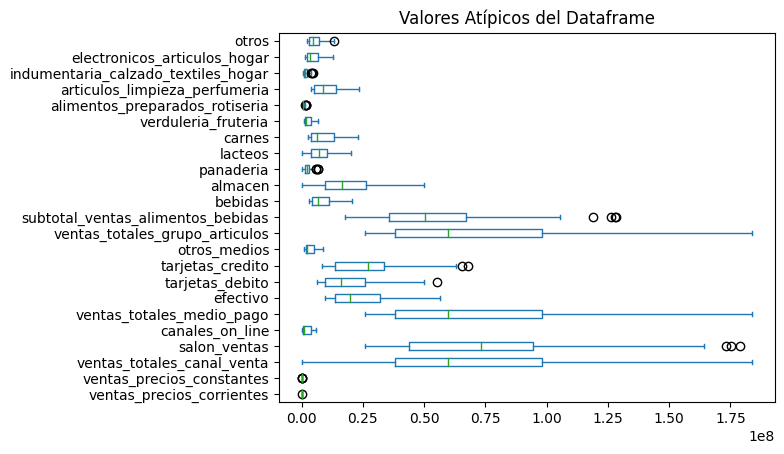

In [48]:
# Diagrama de Caja Bigote
fig = plt.figure(figsize =(15, 8))            # Tamaño de la figura
VT_clean.plot(kind='box', vert=False)         # Ploteamos las variables cuantitativas, seleccionamso el diagrama de caja bigote
                                              # Y se hace vertical

plt.title("Valores Atípicos del Dataframe")   # Titulo de la grafica
plt.show()                                    # Para mostrar la grafica

**Método con Cuartiles**

In [49]:
y = Cuantita

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Lim_Sup_iqr = percentile75 + 1.5*iqr
Lim_Inf_iqr = percentile25 - 1.5*iqr
print("Limite superior permitido", Lim_Sup_iqr)
print("Limite inferior permitido", Lim_Inf_iqr)

Limite superior permitido ventas_precios_corrientes              1.923194e+05
ventas_precios_constantes              3.193875e+04
ventas_totales_canal_venta             1.875116e+08
salon_ventas                           1.704401e+08
canales_on_line                        9.196781e+06
ventas_totales_medio_pago              1.875116e+08
efectivo                               5.942022e+07
tarjetas_debito                        5.095222e+07
tarjetas_credito                       6.385618e+07
otros_medios                           1.061843e+07
ventas_totales_grupo_articulos         1.875116e+08
subtotal_ventas_alimentos_bebidas      1.145480e+08
bebidas                                2.282518e+07
almacen                                5.094749e+07
panaderia                              5.413785e+06
lacteos                                2.012752e+07
carnes                                 2.787050e+07
verduleria_fruteria                    7.832862e+06
alimentos_preparados_rotiseria        

In [50]:
# Obtener datos limpios del Dataframe
VT_sin_Outliers_iqr= Cuantita[(y<=Lim_Sup_iqr)&(y>=Lim_Inf_iqr)]
VT_sin_Outliers_iqr

# Corroborar valores nulos
nulos = VT_sin_Outliers_iqr.isnull().sum()
nulos

ventas_precios_corrientes              1
ventas_precios_constantes              3
ventas_totales_canal_venta             0
salon_ventas                           3
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        1
tarjetas_credito                       2
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      4
bebidas                                1
almacen                                0
panaderia                              4
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         4
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    4
electronicos_articulos_hogar           0
otros                                  1
dtype: int64

In [51]:
# Reemplazar valores atípicos (nulos) del dataframe con "mean"
# Realizar una copia del dataframe
VT_clean_iqr = VT_sin_Outliers_iqr.copy()
VT_clean_iqr = VT_clean_iqr.fillna(round(VT_sin_Outliers_iqr.mean(),1))
VT_clean_iqr

# Corroborar valores nulos
nulos = VT_clean_iqr.isnull().sum()
nulos

ventas_precios_corrientes              0
ventas_precios_constantes              0
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                0
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    0
electronicos_articulos_hogar           0
otros                                  0
dtype: int64

<Figure size 1500x800 with 0 Axes>

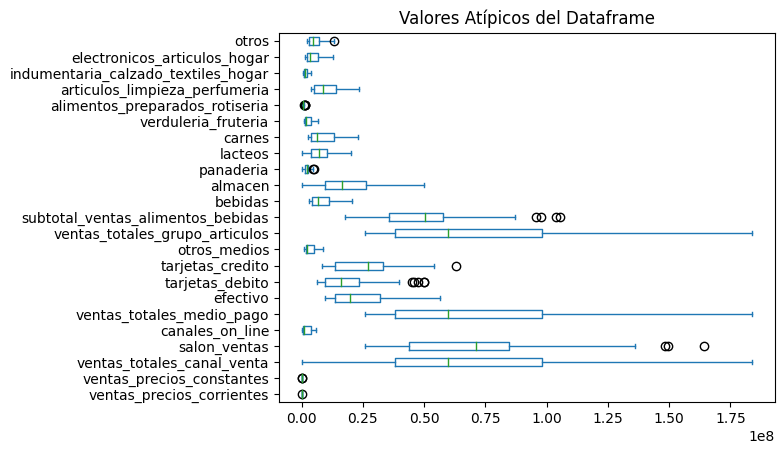

In [52]:
# Diagrama de Caja Bigote
fig = plt.figure(figsize =(15, 8))            # Tamaño de la figura
VT_clean_iqr.plot(kind='box', vert=False)         # Ploteamos las variables cuantitativas, seleccionamso el diagrama de caja bigote
                                              # Y se hace vertical

plt.title("Valores Atípicos del Dataframe")   # Titulo de la grafica
plt.show()                                    # Para mostrar la grafica